In [1]:
#-----Loading in packages-----#
import scvi
import anndata as ad #building anndata objects
import scanpy as sc # Single cell analysis 
import pandas as pd # dataframe manipulation 
import numpy as np
from scipy.io import mmread #Reading in mtx file 
from scipy.sparse import csr_matrix #convert from coo to csr matrix
from rich import print
import seaborn as sns
import os

/projects/b1217/Chris/condaenvs/SCVIEnv/lib/python3.11/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/projects/b1217/Chris/condaenvs/SCVIEnv/lib/python3.11/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [2]:
#-----Setting Seed-----#
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

[rank: 0] Seed set to 0


Last run with scvi-tools version: 1.3.0

In [3]:
#------Generating Anndata from Seurat Object-----#
conversion_dir = "/projects/b1217/HHA/Bulb_Recluster_5_22_AnnData/"
#Contains metadata, barcodes, and umap embeddings 
metadata = pd.read_csv(os.path.join(conversion_dir, "SCRNA_Multiome_Matrix_Metadata_5_22_25.csv"))
#Reading in the count matrix from seurat.combined
counts = mmread(os.path.join(conversion_dir, "SCRNA_Multiome_Matrix_CC_Included_RawCounts_5_22_25.mtx"))
counts = csr_matrix(counts.transpose()) #transposing to cell x gene matrix and converting to csr format
#Contains gene names 
gene_names = pd.read_csv(os.path.join(conversion_dir, "SCRNA_Multiome_Matrix_CC_Included_GeneNames_5_22_25.csv"))
#Log normalized expression for stress genes
stress_genes = pd.read_csv(os.path.join(conversion_dir, "SCRNA_Multiome_Matrix_StressSig_LogNorm_5_22_25.csv"))
stress_genes = stress_genes.set_index("Barcode")
#Converting to anndata object
HHA = ad.AnnData(counts) #creating anndata object
HHA.obs_names = metadata["barcode"] #Adding barcodes as obs names 
HHA.var_names = gene_names["gene"] #adding gene names 
#Saving Count Layer
HHA.layers["counts"] = HHA.X.copy()
#Viewing results
print(HHA)

AnnData object with n_obs × n_vars = 14780 × 1979
    layers: 'counts'

In [4]:
#------Adding metadata to anndata--------#
HHA.obs = metadata
HHA.obs_names = metadata["barcode"]
#Adding normalized stress gene expression to obs
HHA.obs = pd.concat([HHA.obs, stress_genes], axis =1)
HHA.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,SampleID,DonorID,Platform,Isolation,Sex,...,HSP90AA1,SOCS3,JUNB,IER2,DNAJB1,JUND,ZFP36,FOSB,PPP1R15A,CEBPB
CAATACGGTAGTTACC-1_1,EL_A5,62210,7082,4.155281,13.549269,EL_A5,1,V3.1,FUE,M,...,2.779447,0.0,0.496514,0.393553,0.278761,1.273107,0.000000,0.00000,0.000000,0.149063
CCTCATGAGATGCTTC-1_1,EL_A5,58667,7219,4.818723,13.378901,EL_A5,1,V3.1,FUE,M,...,1.965198,0.0,0.929832,0.785350,0.157391,0.616411,0.157391,0.00000,0.000000,0.293346
TCTACCGAGCGTGAAC-1_1,EL_A5,47534,5741,5.951529,25.415492,EL_A5,1,V3.1,FUE,M,...,2.627051,0.0,0.816362,0.905282,0.610582,0.905282,0.000000,0.00000,0.000000,0.718756
CATTCCGTCCGTGGCA-1_1,EL_A5,47018,6854,6.195500,20.619763,EL_A5,1,V3.1,FUE,M,...,2.778857,0.0,0.993798,0.822467,0.354431,2.358096,0.192837,0.00000,0.000000,0.493509
ATACTTCAGCCTCAGC-1_1,EL_A5,45017,7211,1.965924,22.758069,EL_A5,1,V3.1,FUE,M,...,2.146247,0.0,0.200602,0.200602,0.000000,0.200602,0.200602,0.00000,0.200602,0.847082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACACTTGCAGCAAGAT-1_5,EL_E8,1379,826,12.980421,8.339376,EL_E8,5,Multiome,Bulb,M,...,4.077759,0.0,0.000000,0.000000,2.110411,2.110411,0.000000,0.00000,0.000000,0.000000
GAGCTAGCAGCCAGAA-1_5,EL_E8,1187,713,23.588880,8.171862,EL_E8,5,Multiome,Bulb,M,...,3.268572,0.0,2.881959,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
GACGCAACACACTAAT-1_5,EL_E8,1206,772,14.676617,12.271973,EL_E8,5,Multiome,Bulb,M,...,2.866975,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.22914,0.000000,3.253301
GTTAAACGTTGGATAT-1_5,EL_E8,1275,775,21.568627,2.588235,EL_E8,5,Multiome,Bulb,M,...,2.814586,0.0,0.000000,0.000000,0.000000,0.000000,2.179642,0.00000,0.000000,0.000000


In [5]:
#-----Setting Up SCVI Model-----#
#Specifying the donor and sequencing platform as additional categorical covariates for integration
#Not including mitochondrial and ribosomal percentage or cell cycle as covariates, as this may mask real biology
continuous_covariates = stress_genes.columns.to_list() + ["nCount_RNA", "nFeature_RNA", "percent.mt", "percent.ribo"]
scvi.model.SCVI.setup_anndata(HHA, layer="counts", 
                              batch_key="SampleID",
                              categorical_covariate_keys = ["DonorID", "Sex", "Platform"],
                              continuous_covariate_keys = continuous_covariates)
model = scvi.model.SCVI(HHA, n_layers=2, n_latent=50, gene_likelihood= 'nb')
# view anndata_setup as a sanity check
model.view_anndata_setup()

Anndata setup with scvi-tools version 1.3.0.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': 'SampleID',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': ['DonorID', 'Sex', 'Platform'],
│   'continuous_covariate_keys': [
│   │   'ID3',
│   │   'JUN',
│   │   'BTG2',
│   │   'ATF3',
│   │   'HSPE1',
│   │   'CXCL1',
│   │   'EGR1',
│   │   'DUSP1',
│   │   'HSPA1A',
│   │   'HSPA1B',
│   │   'HSP90AB1',
│   │   'HSPB1',
│   │   'CEBPD',
│   │   'DNAJA1',
│   │   'HSPA8',
│   │   'NR4A1',
│   │   'UBC',
│   │   'HSPH1',
│   │   'NFKBIA',
│   │   'FOS',
│   │   'HSP90AA1',
│   │   'SOCS3',
│   │   'JUNB',
│   │   'IER2',
│   │   'DNAJB1',
│   │   'JUND',
│   │   'ZFP36',
│   │   'FOSB',
│   │   'PPP1R15A',
│   │   'CEBPB',
│   │   'nCount_RNA',
│   │   'nFeature_RNA',
│   │   'percent.mt',
│   │   'percent.ribo'
│   ]
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │  16   │
│         n_cells          │ 14780 │
│ n_extra_categorical_covs │   3   │
│ n_extra_continuous_covs  │  34   │
│         n_labels         │   1   │
│          n_vars          │ 1979  │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │           adata.layers['counts']           │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│ extra_continuous_covs  │ adata.obsm['_scvi_extra_continuous_covs']  │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['SampleID'] │   EL_A5    │          0          │
│                       │   EL_A6    │          1          │
│                       │   EL_B6    │          2          │
│                       │   EL_B7    │          3          │
│                       │   EL_B8    │          4          │
│                       │   EL_C5    │          5          │
│                       │   EL_C6    │          6          │
│                       │   EL_E1    │          7          │
│                       │   EL_E3    │          8          │
│                       │   EL_E5    │          9          │
│                       │   EL_E6    │         10          │
│                       │   EL_E7    │         11          │
│                       │   EL_E8    │         12          │
│                       │   EL_H3    │         13          │
│                       │   EL_H5    │         14          │
│                       │   EL_H6    │         15          │
└───────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

           extra_categorical_covs State Registry            
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['DonorID']  │     1      │          0          │
│                       │     2      │          1          │
│                       │     3      │          2          │
│                       │     4      │          3          │
│                       │     5      │          4          │
│                       │     6      │          5          │
│                       │     7      │          6          │
│                       │     8      │          7          │
│                       │     9      │          8          │
│                       │            │                     │
│ adata.obs['Platform'] │  Multiome  │          0          │
│                       │    V3.1    │          1          │
│                       │     V4     │          2          │
│                       │            │                     │
│   adata.obs['Sex']    │     F      │          0          │
│                       │     M      │          1          │
│                       │            │                     │
└───────────────────────┴────────────┴─────────────────────┘

 extra_continuous_covs State 
          Registry           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     adata.obs['ID3']      │
│     adata.obs['JUN']      │
│     adata.obs['BTG2']     │
│     adata.obs['ATF3']     │
│    adata.obs['HSPE1']     │
│    adata.obs['CXCL1']     │
│     adata.obs['EGR1']     │
│    adata.obs['DUSP1']     │
│    adata.obs['HSPA1A']    │
│    adata.obs['HSPA1B']    │
│   adata.obs['HSP90AB1']   │
│    adata.obs['HSPB1']     │
│    adata.obs['CEBPD']     │
│    adata.obs['DNAJA1']    │
│    adata.obs['HSPA8']     │
│    adata.obs['NR4A1']     │
│     adata.obs['UBC']      │
│    adata.obs['HSPH1']     │
│    adata.obs['NFKBIA']    │
│     adata.obs['FOS']      │
│   adata.obs['HSP90AA1']   │
│    adata.obs['SOCS3']     │
│     adata.obs['JUNB']     │
│     adata.obs['IER2']     │
│    adata.obs['DNAJB1']    │
│     adata.obs['JUND']     │
│    adata.obs['ZFP36']     │
│     adata.obs['FOSB']     │
│   adata.obs['PPP1R15A']   │
│    adata.obs['CEBPB']     │
│  adata.obs['nCount_RNA']  │
│ adata.obs['nFeature_RNA'] │
│  adata.obs['percent.mt']  │
│ adata.obs['percent.ribo'] │
└───────────────────────────┘

In [6]:
#--------Training model--------#
model.train(max_epochs = 500, early_stopping = True) 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/projects/b1217/Chris/condaenvs/SCVIEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/projects/b1217/Chris/condaenvs/SCVIEnv/lib/python3.11/site-packages/lightning/pytorch/traine

Training:   0%|          | 0/500 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1246.920. Signaling Trainer to stop.


<Axes: xlabel='epoch'>

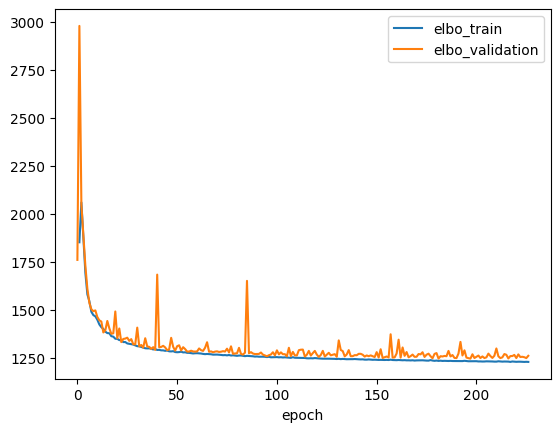

In [7]:
#-----Plotting Model convergence-----#
train_elbo = model.history["elbo_train"][1:]
test_elbo = model.history["elbo_validation"]
ax = train_elbo.plot()
test_elbo.plot(ax=ax)

In [8]:
#-----Extracting Latent Representation from Model----#
HHA.obsm["X_scVI"] = model.get_latent_representation()
HHA.obsm["X_scVI"]

#----Leiden Clustering with default Scanpy workflow------#
sc.pp.neighbors(HHA, use_rep= "X_scVI")
sc.tl.leiden(HHA)
sc.tl.umap(HHA)

/tmp/ipykernel_158197/2676788246.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(HHA)


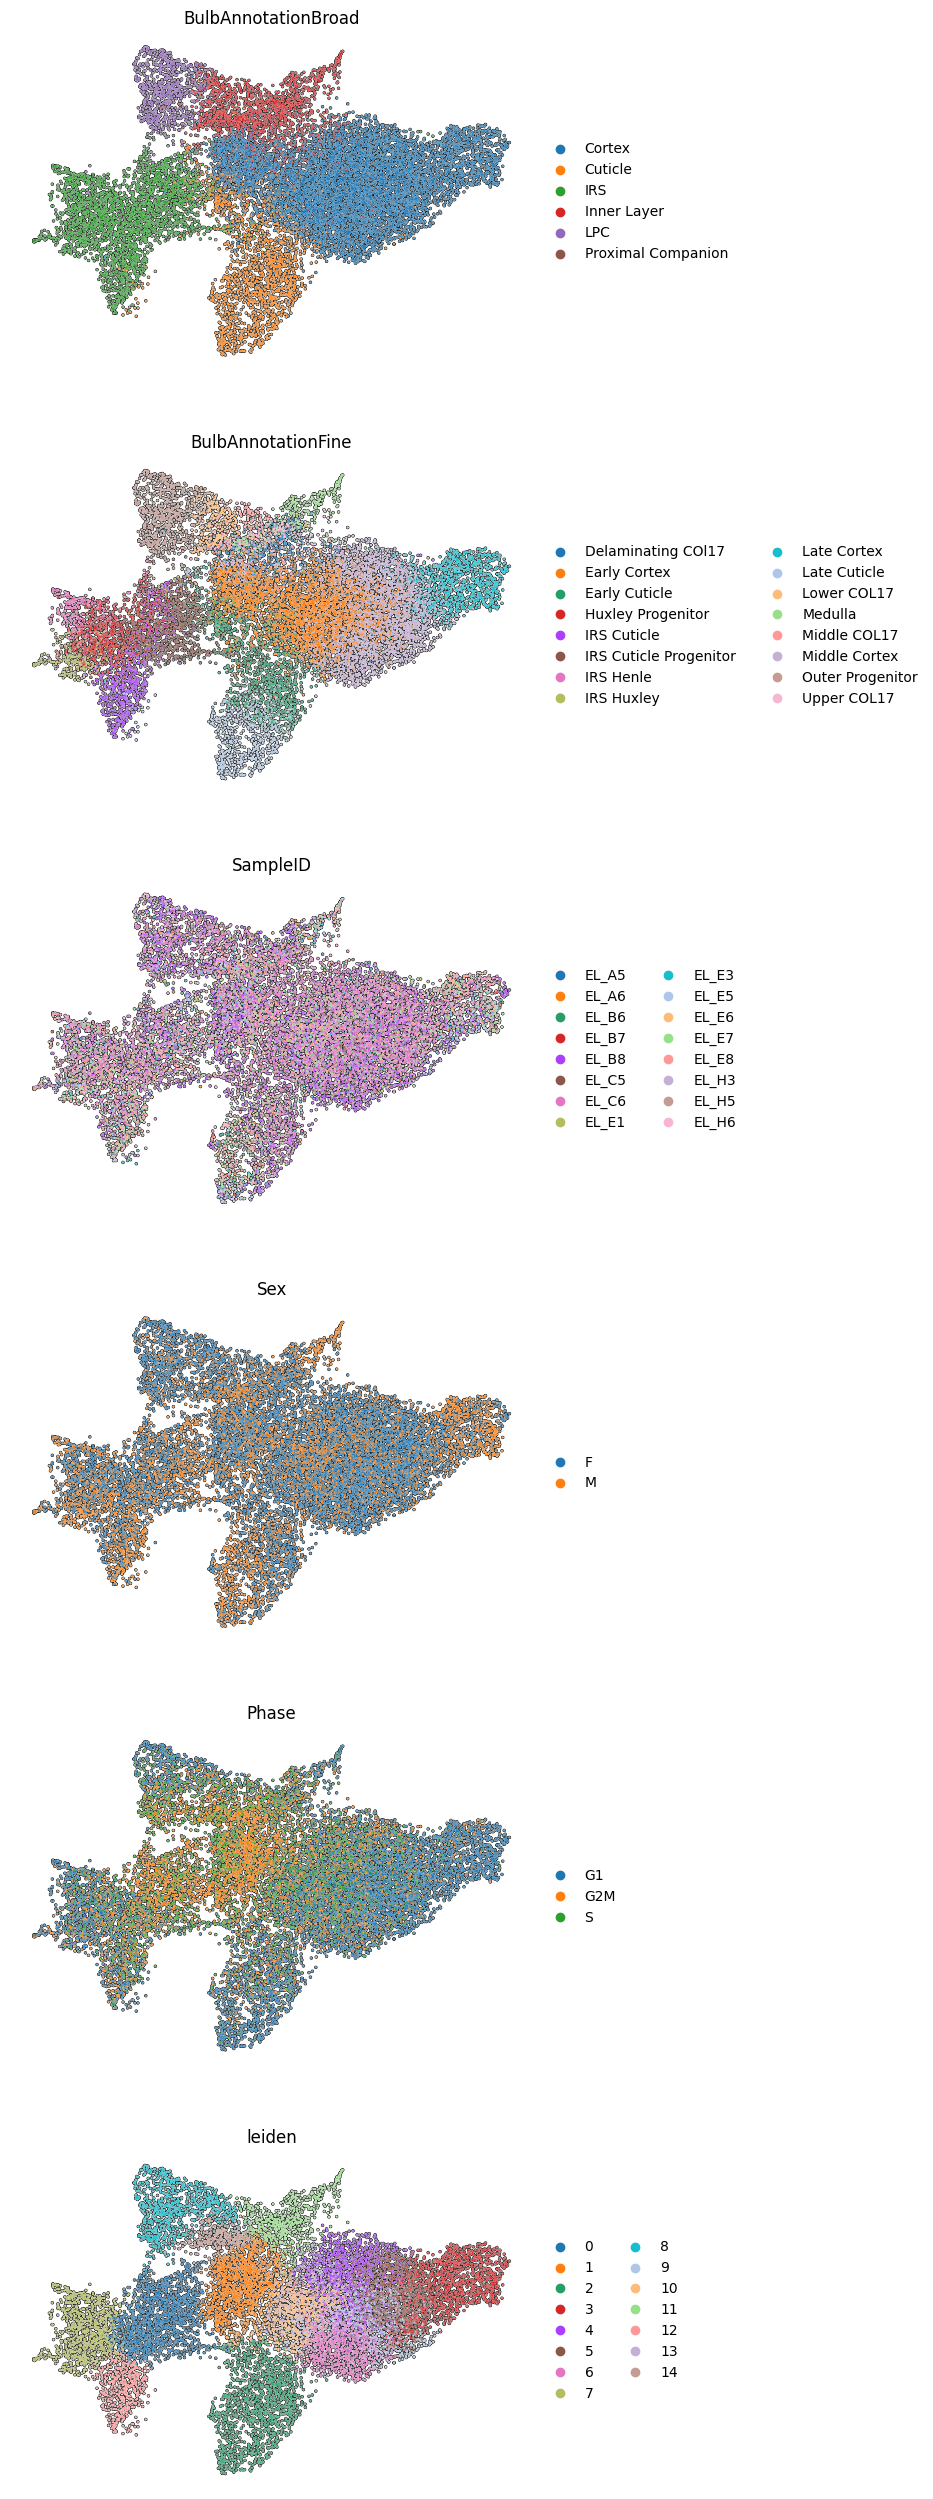

In [9]:
#----- Quickly Visualizing results with UMAP embeddding------#
sc.pl.embedding(HHA,
    basis="X_umap",
    color=['BulbAnnotationBroad', "BulbAnnotationFine", "SampleID", 'Sex', "Phase", 'leiden'],
    frameon=False,
    add_outline=True,
    ncols=1)

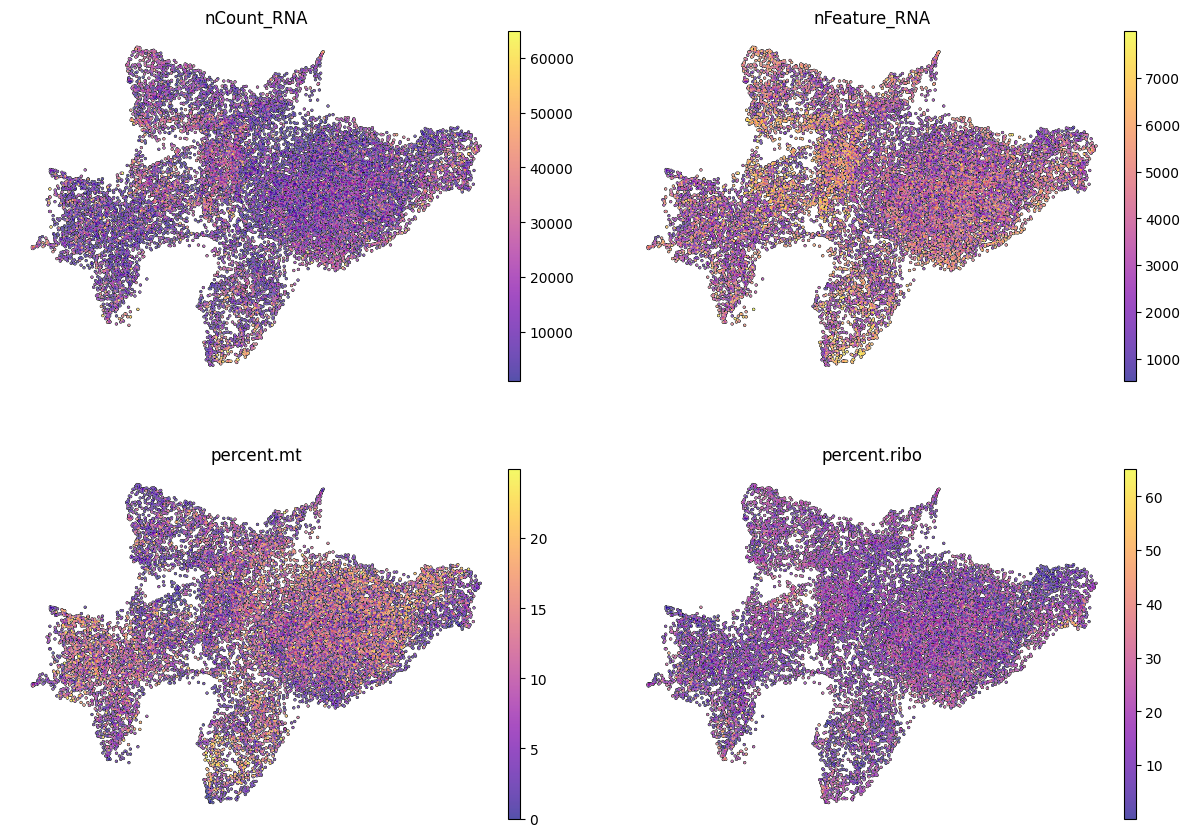

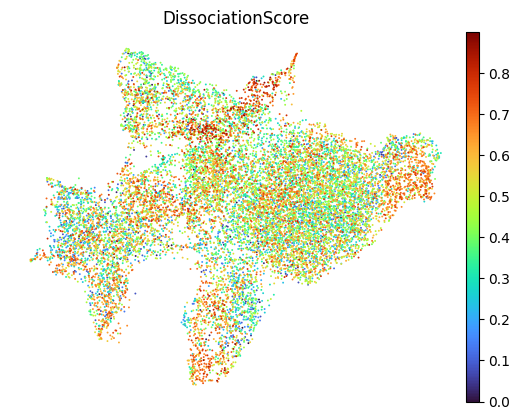

In [10]:
#-----Checking QC Metric mixing in UMAP embeddings------#
sc.pl.embedding(HHA, basis="X_umap",
    color=["nCount_RNA", "nFeature_RNA", "percent.mt", "percent.ribo"],
    cmap = "plasma", frameon=False, add_outline=True, size = 7.5, ncols=2)
sc.pl.embedding(HHA, basis="X_umap",
    color=["DissociationScore"],
    cmap = "turbo", size = 7.5, frameon=False, ncols=2)

In [11]:
#-------Extracting SCVI Latent Dimensions and Writing to CSV-----#
HHA_Latent = pd.DataFrame(HHA.obsm["X_scVI"])
HHA_Latent.columns = ["SCVI_" + str(i) for i in range(1, 51)]
HHA_Latent["Barcode"] = HHA.obs_names
HHA_Latent.head(10)
HHA_Latent.to_csv(os.path.join(conversion_dir, "HHA_SCRNA_Multiome_RNA_Matrix_CC_Included_LatentRep_5_22_25.csv"),
                               index = False)